In [1]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg
from multiprocess import Pool
from functools import partial
import numpy as np
from functools import partial
from scipy.sparse import coo_matrix, csr_matrix, find, tril
import networkx as nx
import csv

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [3]:
runs = list(range(339,346))
runs

[339, 340, 341, 342, 343, 344, 345]

In [6]:

fname = "../../data/topic_data/run_{}.xlsx".format(runs[0])

writer = pd.ExcelWriter(fname)

for i in range(1,len(runs)):

    topics1 = Topic.objects.filter(run_id=runs[i-1])
    topics2 = Topic.objects.filter(run_id=runs[i])

    df = pd.DataFrame.from_dict(list(topics2.values('title','id')))
    df['similarity'] = 0
    df['stopic'] = ""

    for t in topics2:
        scores = [0]
        titles = [""]
        t.top_words = Term.objects.filter(topicterm__topic=t)
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)

        
        m = max(scores)
        df.loc[df['id']==t.id,'similarity'] = m
        df.loc[df['id']==t.id,'stopic'] = titles[scores.index(max(scores))]


    df = df.sort_values('similarity',ascending=False)
    df.head()
    
    
    

    
    df.to_excel(writer,"run_{}".format(runs[i]))
    
writer.save()

In [3]:
runs = list(range(295,300))

writer = pd.ExcelWriter(fname)
fname = "../../data/topic_data/run_{}.xlsx".format(runs[0])

dynamic = True

for i in range(1,len(runs)):
    
    if dynamic==True:
        topics1 = DynamicTopic.objects.filter(run_id=runs[i-1])
        topics2 = DynamicTopic.objects.filter(run_id=runs[i])
    else:
        topics1 = Topic.objects.filter(run_id=runs[i-1])
        topics2 = Topic.objects.filter(run_id=runs[i])       

    df = pd.DataFrame.from_dict(list(topics2.values('title','id')))
    df['similarity'] = 0
    df['stopic'] = ""

    for t in topics2:
        scores = [0]
        titles = [""]
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)

        
        m = max(scores)
        df.loc[df['id']==t.id,'similarity'] = m
        df.loc[df['id']==t.id,'stopic'] = titles[scores.index(max(scores))]


    df = df.sort_values('similarity',ascending=False)
    df.head()
    
    
    
    
    

    
    df.to_excel(writer,"run_{}".format(runs[i]))
    
writer.save()

In [14]:
runs = list(range(339,347))

#runs.append(330)
#runs.append(331)
#runs.append(332)


#runs = [295,296,297]

col1s = []
col2s = []
ss = []
scols = []

print(len(runs))

for i in range(1,len(runs)):

    print(i)
    topics1 = DynamicTopic.objects.filter(run_id=runs[i-1])
    topics2 = DynamicTopic.objects.filter(run_id=runs[i])
    

    df = pd.DataFrame.from_dict(list(topics2.values('title','score')))
    
    df2 = pd.DataFrame.from_dict([{'title': 'None','score': 0}])
    
    df = df.append(df2)

    
    
    col1 = "run_{}_topics_{}".format(runs[i-1],topics1.count())
    
    scol = "scores_{}".format(runs[i])
    bscol = "scores_{}".format(runs[i-1])
    
    if i==1:
        scols.append(bscol)
    
    col1s.append(col1)
    scols.append(scol)
    
    col2 = "run_{}_topics_{}".format(runs[i], topics2.count())
    
    col2s.append(col2) 
    
    s = "similarity_{}-{}".format(runs[i-1],runs[i])
    ss.append(s)
    
    df = df.rename(columns = {'title': col2, 'score': scol})

    df[s] = 0
    df[col1] = "None"
    df[bscol] = 0

    for t in topics2:
        scores = [0]
        titles = [""]
        tscores = [0]
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)
                tscores.append(ct.score)

        
        m = max(scores)
        df.loc[df[col2]==t.title, s] = m
        if m==0:
            df.loc[df[col2]==t.title, col1] = 'None'
        else:
            df.loc[df[col2]==t.title, col1] = titles[scores.index(max(scores))]
            df.loc[df[col2]==t.title, bscol] = tscores[scores.index(max(scores))]
            

    if i==1:   
        #df = pd.DataFrame.from_dict(list(topics2.values('title')))
        mdf = df
    else:
        mdf = mdf.merge(df,how="outer").fillna("")
    

columns = []
for i in range(len(col1s)):
    columns.append(col1s[i])
    columns.append(scols[i])
    columns.append(ss[i])
    if i == len(col1s)-1:
        columns.append(col2s[i])
        columns.append(scols[i+1])

print(columns)

mdf = mdf[columns]

mdf.head()



8
1
2
3
4
5
6
7
['run_339_topics_50', 'scores_339', 'similarity_339-340', 'run_340_topics_75', 'scores_340', 'similarity_340-341', 'run_341_topics_100', 'scores_341', 'similarity_341-342', 'run_342_topics_125', 'scores_342', 'similarity_342-343', 'run_343_topics_150', 'scores_343', 'similarity_343-344', 'run_344_topics_175', 'scores_344', 'similarity_344-345', 'run_345_topics_200', 'scores_345', 'similarity_345-346', 'run_346_topics_225', 'scores_346']


,run_339_topics_50,scores_339,similarity_339-340,run_340_topics_75,scores_340,similarity_340-341,run_341_topics_100,scores_341,similarity_341-342,run_342_topics_125,...,scores_343,similarity_343-344,run_344_topics_175,scores_344,similarity_344-345,run_345_topics_200,scores_345,similarity_345-346,run_346_topics_225,scores_346
0,"{crop, yield, rotat}",5602.845898,10,"{crop, yield, rotat}",2942.090658,10,"{crop, yield, rotat}",2901.781567,4,"{rice, yield, grain}",...,474.122152,9,"{rice, yield, varieti}",465.328157,9,"{rice, yield, straw}",491.917,9,"{rice, yield, straw}",86.7661
1,"{crop, yield, rotat}",5602.845898,10,"{crop, yield, rotat}",2942.090658,10,"{crop, yield, rotat}",2901.781567,4,"{rice, yield, grain}",...,541.990968,9,"{weed, herbicid, seed}",293.095380,10,"{weed, herbicid, seed}",407.314,10,"{weed, herbicid, seed}",73.9081
2,"{crop, yield, rotat}",5602.845898,10,"{crop, yield, rotat}",2942.090658,10,"{crop, yield, rotat}",2901.781567,9,"{crop, rotat, weed}",...,2137.386901,10,"{crop, rotat, residu}",2137.386901,5,"{yield, wheat, grain}",910.653,10,"{yield, wheat, grain}",133.931
3,"{crop, yield, rotat}",5602.845898,10,"{crop, yield, rotat}",2942.090658,10,"{crop, yield, rotat}",2901.781567,9,"{crop, rotat, weed}",...,2137.386901,10,"{crop, rotat, residu}",2137.386901,8,"{crop, rotat, residu}",2177.23,10,"{crop, rotat, residu}",226.437
4,"{crop, yield, rotat}",5602.845898,10,"{crop, yield, rotat}",2942.090658,10,"{crop, yield, rotat}",2901.781567,4,"{fertil, yield, nutrient}",...,460.833547,10,"{nutrient, fertil, nitrogen}",450.254122,8,"{nutrient, nitrogen, balanc}",348.221,10,"{nutrient, nitrogen, balanc}",72.3625


In [15]:
#col1s.append(col2)


#mdf = mdf.sort_values(columns,ascending=False).reset_index()


res = mdf.groupby(columns)



res = res.apply(lambda x: x.sort_values(s,ascending=False))

l = len(res)




fname = "../../data/topic_data/run_compare_{}_{}.xlsx".format(runs[0],runs[len(runs)-1])

writer = pd.ExcelWriter(fname, engine='xlsxwriter')

res.to_excel(writer)

worksheet = writer.sheets['Sheet1']

for i in range(len(ss)):
    if (i+1)*3 > 26:
        c = 'A'+chr(ord('A')-1+((i+1)*3)-26)
    else:
        c = chr(ord('A')-1+(i+1)*3)
    r = "{}2:{}{}".format(c,c,len(res))
    print(r)
    
    worksheet.conditional_format(r, {
        'type': '3_color_scale',
        'min_value': 0,
        'mid_value': 5,
        'max_value': 10,
        'min_type': 'num',
        'mid_type': 'num',
        'max_type': 'num',
    })

writer.save()

res.head() 
    
    
res.head()

C2:C229
F2:F229
I2:I229
L2:L229
O2:O229
R2:R229
U2:U229


run_339_topics_50  \
run_339_topics_50 scores_339 similarity_339-340 run_340_topics_75            scores_340  similarity_340-341 run_341_topics_100    scores_341 similarity_341-342 run_342_topics_125       scores_342  similarity_342-343 run_343_topics_150       scores_343 similarity_343-344 run_344_topics_175       scores_344 similarity_344-345 run_345_topics_200       scores_345 similarity_345-346 run_346_topics_225       scores_346                         
None              0.0        0                  None                         0.000000    0                  None                  0.000000   0                  None                     0.000000    0                  None                     0.000000   0                  None                     0.000000   0.0                None                     0.000000   0.0                None                     0.000000   228              None   
                                                                                                                                                                                                                                                                                                                                                                                             }                        0.000000   226              None   
                                                                                                                                                                                                                                                                                                                                                                                                                                 227              None   
                                                {treatment, wastewat, remov} 5782.771887 1                  {membran, flux, foul} 673.978024 2                  {adsorpt, adsorb, remov} 2208.602815 8                  {adsorpt, adsorb, remov} 609.040582 10                 {adsorpt, adsorb, remov} 609.040582 9.0                {adsorpt, adsorb, remov} 609.040582 9.0                {adsorpt, adsorb, remov} 76.295672  83               None   
                                                                                                                                             9                  {membran, flux, foul}    649.336506  10                 {membran, flux, foul}    649.336506 10                 {membran, flux, foul}    649.336506 4.0                {membran, flux, foul}    46.303182  10.0               {membran, flux, foul}    2.704279   86               None   

                                                                                                                                                                                                                                                                                                                                                                                                                                      scores_339  \
run_339_topics_50 scores_339 similarity_339-340 run_340_topics_75            scores_340  similarity_340-341 run_341_topics_100    scores_341 similarity_341-342 run_342_topics_125       scores_342  similarity_342-343 run_343_topics_150       scores_343 similarity_343-344 run_344_topics_175       scores_344 similarity_344-345 run_345_topics_200       scores_345 similarity_345-346 run_346_topics_225       scores_346                   
None              0.0        0                  None                         0.000000    0                  None                  0.000000   0                  None                     0.000000    0                  None                     0.000000   0                  None                     0.000000   0.0                None                     0.000000   0.0                None                     0.000000   228         0.0   
                  

In [ ]:
print(mdf)

In [ ]:
runs = list(range(295,300))

runs = []

for i in range(len(runs)):

    topics = Topic.objects.filter(run_id=runs[i])
    
    tree = []
    
    for t in topics:
        
        tdict = {
            "parent_similarity": 0,
            "run": runs[i],
            "ntopics": topics.count(),
            "title": t.title,
            "sim_topics": [],
            "child_topics": 0
        }
        
        if i==0:
            tree.append(tdict)
        else:
            
            scores = [0]
            titles = [""]
            for ct in comparison_topics:
                score = len(set(t.top_words).intersection(set(ct.top_words)))
                if score>0:
                    scores.append(score)
                    titles.append(ct.title)


                parent = titles[scores.index(max(scores))]
                
                
                
                print(m)

In [143]:
run_id = 337

run = RunStats.objects.get(pk=run_id)

dts = DocTopic.objects.filter(
    run_id=run_id,
    doc__content__iregex='\w'
).values('doc__PY').annotate(
    n = Count('doc', distinct=True),
    k = Count('topic', distinct=True)
)

df =  pd.DataFrame.from_dict(list(dts))

df.tail()

,doc__PY,k,n
19,2009,80,7143
20,2010,79,8239
21,2011,81,9846
22,2012,88,11334
23,2013,94,13813


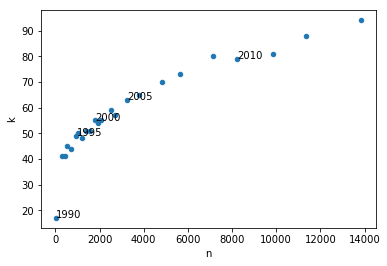

In [144]:

ax = df.plot.scatter('n','k')

list(df.k)

for index, row in df.iterrows():
    if row['doc__PY'] % 5 ==0:
        ax.text(row['n'],row['k'],row['doc__PY'])



plt.show()

In [97]:
qid = run.query.id
y = 1990
docs = Doc.objects.filter(query=qid,relevant=True,content__iregex='\w',PY=y)


docs.distinct().count()

37